# Projeto 3

## Precessão do periélio de Mercúrio

As leis de Kepler foram desenvolvidas com base em medidas (extremamente acuradas) realizadas a olho nú. Quando equipamentos mais precisos para medição de posição e tempo foram desenvolvidos, ficou claro que a trajetória de Mercúrio não era como esperado uma elipse, mas sim uma elipse com um deslocamento contínuo em seu periélio.

O deslocamento pode ser medido como de 566 arco-segundos por século. Posteriormente se descobriu que uma boa parte desse deslocamento é devida à influência dos outros planetas do sistema solar (além do Sol). Os cálculos prevêm o deslocamento de 523 arco-segundos por século. Resta então explicar aproximadamente 43 arco-segundos por século do deslocamento.

A explicação somente surgiu com o desenvolvimento da teoria da relatividade geral, que altera a lei da gravitação. Considerando o fator mais significativo, a força de gravitação fica adaptada para incluir fator relativístico da seguinte forma (escrita para a interação entre o Sol e Mercúrio):

$$ F_G = \frac{GM_SM_M}{r^2}\left(1 + \frac{\alpha}{r^2}\right),$$

onde $\alpha\approx1.1\cdot10^{-8}\,\mathrm{UA}^2$ (para Mercúrio), $GM_S=4\pi^2\,\mathrm{UA}^3/\mathrm{ano}^2$ e a força é na direção radial para dentro. Projetando a força nas direções $(x,y)$ e considerando o Sol na origem:

\begin{eqnarray}
\frac{d^2x}{dt^2} & = & -\frac{GM_S}{r^3}\left(1 + \frac{\alpha}{r^2}\right)x\\
\frac{d^2y}{dt^2} & = & -\frac{GM_S}{r^3}\left(1 + \frac{\alpha}{r^2}\right)y\\
\end{eqnarray}

onde $r = \sqrt{x^2+y^2}.$

Para completar, usamos as seguintes condições iniciais com Mercúrio inicialmente no seu ponto mais afastado do Sol (veja seção 4.3 do livro *Computational Physics* de Giordano e Nakanishi para explicação das expressões):

\begin{eqnarray}
x(0) & = & (1+e)a\\
y(0) & = & 0\\
v_x(0) & = & 0\\
v_y(0) & = & \sqrt{\frac{GM_S(1-e)}{a(1+e)}},
\end{eqnarray}

onde para Mercúrio $a \approx 0.39\,\mathrm{UA}$ (eixo maior da elipse) e $e\approx0.206$ (excentricidade).

O projeto consiste em avaliar a contribuição do fator relativístico para a precessão do periélio de Mercúrio.

Você deve proceder da seguinte forma:
1. Implemente código para integrar a trajetória de Mercúrio usando as equações e condições iniciais acima.
1. Simule por aproximadamente 10 períodos de revolução para $\alpha=0$ e plote um gráfico da trajetória. Este é o caso não-relativístico, e a trajetória deve ser uma elipse perfeita com o sol em um dos focos. Use um tamanho de passo de tempo suficientemente preciso. Lembre-se de que o período de rotação de Mercúrio é de aproximadamente 88 dias.
1. Repita a simulação, mas agora com $\alpha=0.01$. Este é um caso com fator relativístico grande, o que significa que a precessão deve ser claramente visível na trajetória.
1. O valor de $\alpha=1.1\cdot10^{-8}$ para Mercúrio é extremamente baixo, o que significa que seria necessário simular o sistema por um grande intervalo de tempo para permitir avaliar a taxa de precessão. Ao invés disso, vamos seguir um outro método: Vamos avaliar a taxa de precessão para diversos valores de $\alpha$. Veremos então que ela varia linearmente com $\alpha$. Avaliaremos então a expressão da dependência linear e calcularemos a taxa de precessão usando o $\alpha$ conhecido de Mercúrio, conforme descrito nos passos abaixo.
1. O primeiro passo é encontrar um método para marcar um ponto específico da elipse, para podermos avaliar como ele está se deslocando com o tempo. Para isso, usaremos o ponto mais afastado do Sol. Esse ponto pode ser determinado pelo seguinte raciocínio: O ponto mais afastado é aquele para o qual antes de chegar nele as distâncias vão aumentando, de depois que ele passa as distâncias vâo diminuindo. Dizendo de outra forma, ele é um ponto onde a derivada é zero, e a derivada é positiva antes dele e negativa depois dele. Ao invés de usar a distância, usaremos a distância ao quadrado (pois o ponto de máximo é o mesmo).
$$\frac{d}{dt}r^2 = \frac{d}{dt}(x^2 + y^2) = 2\left(x\frac{dx}{dt} + y\frac{dy}{dt}\right).$$
O fator 2 pode ser ignorado para nossos propósitos (não afeta o ponto de máximo). Queremos então os valores de $t$ para os quais a expressão
$$x v_x + y v_y$$
passa de positiva para negativa. Os valores de $x, y, v_x$ e $v_y$ são calculados durante a solução das equações diferenciais. Usando os valores retornados pela rotina de integração, calcule os valores da expressão acima e encontre os pontos onde ele passa de positivo (ou zero) para negativo (ou zero). Para nossos propósitos, basta guardar um desses pontos (o último positivo ou o primeiro negativo) como o ponto de transição. Encontre os valores dos ângulos entre o eixo $x$ e o raio da posição de Mercúrio (dica: Esse ângulo pode ser calculado usando `numpy.arctan2`, veja documentação).
1. Plote um gráfico com os ângulos contra o tempo desses pontos e verifique que eles formam uma reta (aproximadamente) que passa pela origem.
1. Use a função `curve_fit` do módulo `scipy.optimize` para fazer um ajuste da função $\theta = \rho t$ a esses pontos (a função `curve_fit` irá retornar, entre outros, o valor desejado de `\rho`, que é a taxa de precessão para o $\alpha$ usado na simulação).
1. Repita a simulação e o ajuste de curva para 20 valores de $\alpha$ entre 0 e 0.002, encontrando os valores de $\rho$ para cada um dos $\alpha$.
1. Plote o gráfico de $\rho$ versus $\alpha$ e verifique que ele é uma linha reta que passa pela origem.
1. Use novamente `curve_fit`, mas agora para ajustar $\rho = c \alpha$ e econtrar o melhor valor de $c$.
1. Usando o valor de $c$ encontrado e o valor de $\alpha$ conhecido para Mercúrio (acima), calcule a taxa de precessão de Mercúrio devida a efeitos relativísticos e confira com o valor esperado (acima).

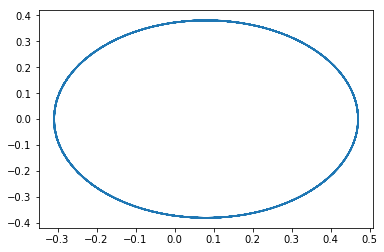

In [1]:
from math import sqrt,pi
import numpy as np
import matplotlib.pyplot as plt

T = 88/365
T = T*10
t = np.linspace(0, T, 500+1)

e = 0.206
a = 0.39
GMs = 4*pi**2
al = 0

x0 = (1 + e) * a
y0 = 0
vx0 = 0
vy0 = sqrt((GMs*(1 - e))/(a *(1 + e)))

def deriv_ideal(xyuv, t, GMs, al):
    x, y, u, v = xyuv
    r = sqrt(x**2 + y**2)
    return [u, v, -(GMs / r**3)*(1 + (al / r**2))*x, -(GMs / r**3)*(1 + (al / r**2))*y]

from scipy.integrate import odeint
iniciais = [x0, y0, vx0, vy0]
xyuv_t = odeint(deriv_ideal, iniciais, t, args=(GMs,al))
xs = xyuv_t[:, 0]
ys = xyuv_t[:, 1]
plt.plot(xs,ys)
plt.show()

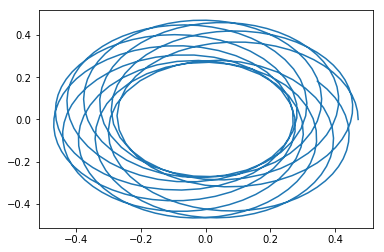

In [2]:
from math import sqrt,pi
import numpy as np
import matplotlib.pyplot as plt

T = 88/365
T = T*10
t = np.linspace(0, T, 500+1)

e = 0.206
a = 0.39
GMs = 4*pi**2
al = 0.01

x0 = (1 + e) * a
y0 = 0
vx0 = 0
vy0 = sqrt((GMs*(1 - e))/(a *(1 + e)))

def deriv_ideal(xyuv, t, GMs, al):
    x, y, u, v = xyuv
    r = sqrt(x**2 + y**2)
    return [u, v, -(GMs / r**3)*(1 + (al / r**2))*x, -(GMs / r**3)*(1 + (al / r**2))*y]

from scipy.integrate import odeint
iniciais = [x0, y0, vx0, vy0]
xyuv_t = odeint(deriv_ideal, iniciais, t, args=(GMs,al))
xs = xyuv_t[:, 0]
ys = xyuv_t[:, 1]
plt.plot(xs,ys)
plt.show()

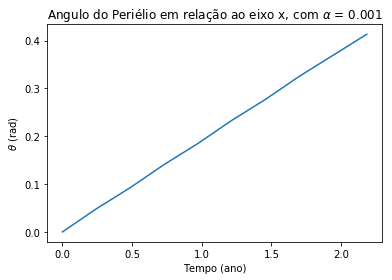

In [3]:
from math import sqrt,pi,atan2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

T = 88/365
T = T*10
t = np.linspace(0, T, 10000+1)
Ant = 1

e = 0.206
a = 0.39
GMs = 4*pi**2
al = 0.001

x0 = (1 + e) * a
y0 = 0
vx0 = 0
vy0 = sqrt((GMs*(1 - e))/(a *(1 + e)))
theta = [0]
tc = [0]

def deriv_ideal(xyuv, t, GMs, al):
    x, y, u, v = xyuv
    r = sqrt(x**2 + y**2)
    return [u, v, -(GMs / r**3)*(1 + (al / r**2))*x, -(GMs / r**3)*(1 + (al / r**2))*y]

from scipy.integrate import odeint
iniciais = [x0, y0, vx0, vy0]
xyuv_t = odeint(deriv_ideal, iniciais, t, args=(GMs,al))
for i in range (0,xyuv_t.shape[0]):
    if (((xyuv_t[i,0]*xyuv_t[i,2]) + (xyuv_t[i,1]*xyuv_t[i,3])) < 0 and Ant > 0):
        theta.append(atan2(xyuv_t[i, 1],xyuv_t[i, 0]))
        tc.append(t[i])
    Ant = (xyuv_t[i,0]*xyuv_t[i,2] + xyuv_t[i,1]*xyuv_t[i,3])
plt.ylabel(r'$\theta$ (rad)')
plt.xlabel('Tempo (ano)')
plt.title(r'Angulo do Periélio em relação ao eixo x, com $\alpha$ = 0.001')
plt.plot(tc,theta)
plt.show()

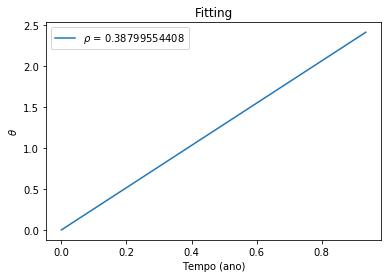

In [22]:
def func(t, ro):
    thet = ro*t
    return thet
rho = curve_fit(func, tc, theta)[0] #O valor de rho pode ficar diferente se eu fizer o fitting com theta em rad
ro = rho[0]
plt.plot(rho*t,t, label = r'$\rho$ = %s'%(ro))
plt.title('Fitting')
plt.ylabel(r'$\theta$')
plt.xlabel('Tempo (ano)')
plt.legend()
plt.show()

$\rho$ =  0.00109107148332
$\rho$ =  0.0198019909052
$\rho$ =  0.0383497588752
$\rho$ =  0.057450378775
$\rho$ =  0.0762009035416
$\rho$ =  0.094669387879
$\rho$ =  0.113576666153
$\rho$ =  0.132976904119
$\rho$ =  0.151977575347
$\rho$ =  0.171293204992
$\rho$ =  0.190450311745
$\rho$ =  0.2101569724
$\rho$ =  0.229539387112
$\rho$ =  0.248635776627
$\rho$ =  0.268172290153
$\rho$ =  0.28820614381
$\rho$ =  0.307842436115
$\rho$ =  0.327793674082
$\rho$ =  0.34813549303
$\rho$ =  0.367963398739
$\rho$ =  0.38799554408


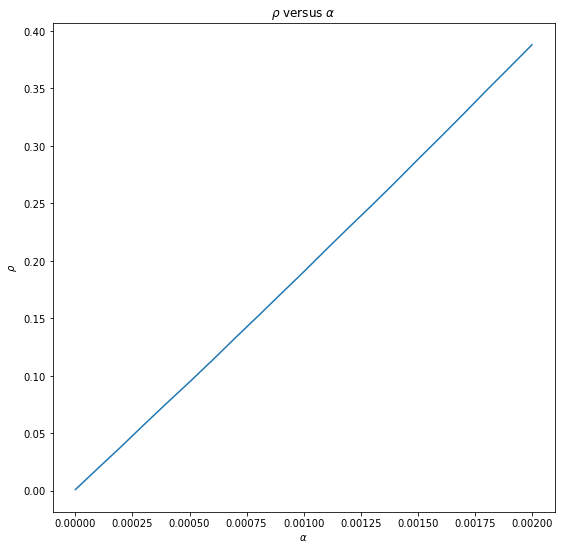

In [5]:
T = 88/365
T = T*10
t = np.linspace(0, T, 10000+1)
Ant = 1

e = 0.206
a = 0.39
GMs = 4*pi**2
al = np.linspace(0, 0.002, 21)

x0 = (1 + e) * a
y0 = 0
vx0 = 0
vy0 = sqrt((GMs*(1 - e))/(a *(1 + e)))
theta = [0]
tc = [0]

def deriv_ideal(xyuv, t, GMs, al):
    x, y, u, v = xyuv
    r = sqrt(x**2 + y**2)
    return [u, v, -(GMs / r**3)*(1 + (al / r**2))*x, -(GMs / r**3)*(1 + (al / r**2))*y]

from scipy.integrate import odeint
iniciais = [x0, y0, vx0, vy0]

xg = []
yg = []
for j in range (0,21):
    theta = [0]
    tc = [0]
    xyuv_t = odeint(deriv_ideal, iniciais, t, args=(GMs,al[j]))
    for i in range (0,xyuv_t.shape[0]):
        if (((xyuv_t[i,0]*xyuv_t[i,2]) + (xyuv_t[i,1]*xyuv_t[i,3])) < 0 and Ant > 0):
            theta.append(atan2(xyuv_t[i, 1],xyuv_t[i, 0]))
            tc.append(t[i])
        Ant = (xyuv_t[i,0]*xyuv_t[i,2] + xyuv_t[i,1]*xyuv_t[i,3])
    rho = curve_fit(func, tc, theta)[0]
    ro = rho[0]
    print(r"$\rho$ = ",ro)
    yg.append(ro)
    xg.append(al[j])

plt.figure(figsize=(9,9))
plt.plot(xg,yg)
plt.ylabel(r'$\rho$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\rho$ versus $\alpha$')
plt.show()


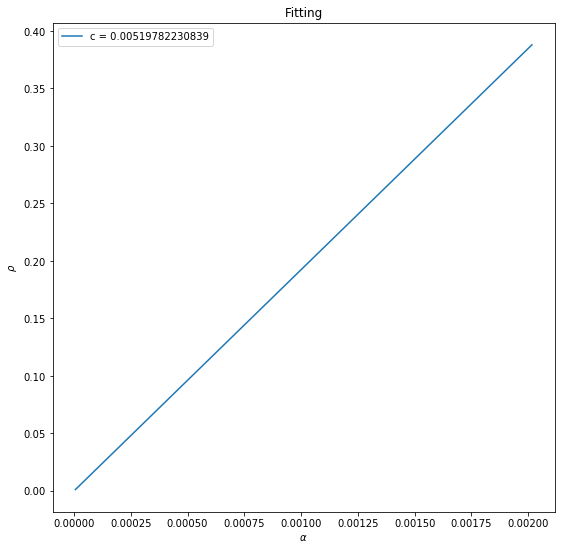

In [37]:
def func(ro, c):
    thet = ro*c
    return thet
c = curve_fit(func, yg, xg)[0]
rro = c[0]
plt.figure(figsize=(9,9))
plt.plot(c*yg,yg, label = 'c = %s'%(rro))
plt.title('Fitting')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In [38]:
rhofinal = c[0] * 1.1e-8 
print('Taxa de precessão final:',rhofinal)

Taxa de precessão final: 5.71760453922e-11
